In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Ride_booking.csv')

In [3]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


- Now we have the dataset, let's first see all the parameters (columns) that this data has.

In [4]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

- These are the total number of columns that we have in the dataset. 

- Now before we start the EDA process. We should check if the data is clean or not

In [5]:
df.columns.isna().sum()

np.int64(0)

- As we can see, there are no values in the dataset that is practically empty.
- The main confusion over here is that when we saw the 'Cancelled rides by customer/driver' columns, they contain a lot of 'NaN' values but we should understand that these are not missing values. Instead, these help us in identifying the cases where the cab got cancelled.
- Now let's see some basic analysis of all the columns that we have. We can use the describe() function to do the analysis of the numerical data and then we will continue to do some analysis on the non-numeric data that we have.

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


- Now we should check the dates and times to see how cab demand behaves according to the date and time.

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') #This will help us in safely parsing the date data to proper format

In [8]:
#Now we will see the date that saw the most number of taxi bookings
most_freq_date = df['Date'].mode(dropna=True)
print(most_freq_date)

0   2024-11-16
Name: Date, dtype: datetime64[ns]


In [9]:
#To get an even better idea, we should check the top 10 most busy days
top10 = df['Date'].value_counts().head(10)
print(top10)

Date
2024-11-16    462
2024-09-18    456
2024-05-09    456
2024-10-12    452
2024-02-06    452
2024-01-26    452
2024-07-17    451
2024-10-13    451
2024-10-09    451
2024-11-29    450
Name: count, dtype: int64


- After analysing the dates, we find that they don't follow any particular pattern.
- Out of the top 10, 4 were weekend dates and 3 were public holidays. To check for any co-relation between day and booking frequency, we should extract the days of all the dates and check if they make any sense.

In [10]:
#Creating a day column to check for any relation between day and booking frequency
df['Day'] = df['Date'].dt.day_name()
df['Day']

0          Saturday
1            Friday
2            Friday
3            Monday
4            Monday
            ...    
149995       Monday
149996       Sunday
149997    Wednesday
149998     Saturday
149999       Sunday
Name: Day, Length: 150000, dtype: object

In [11]:
daywise_booking_freq = df['Day'].value_counts()
print(daywise_booking_freq)

Day
Monday       21644
Saturday     21542
Wednesday    21413
Sunday       21398
Friday       21397
Tuesday      21391
Thursday     21215
Name: count, dtype: int64


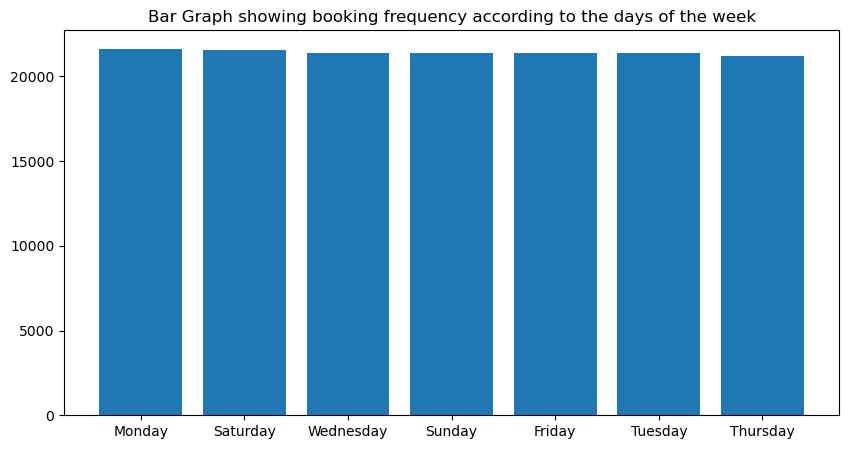

In [12]:
#Plotting a bar graph to showcase the frequency
labels = daywise_booking_freq.index
values = daywise_booking_freq.values
plt.figure(figsize = (10,5))
plt.title('Bar Graph showing booking frequency according to the days of the week')
plt.bar(labels,values)
plt.show()

- As we can see that there is not much dependency of booking frequency on the day.
- Let's look for any other relation that we might be able to make out.

- Now we should check whether we can see any relation by the time of booking. For this we will categorize that we have hour-wise to be able to draw any conclusions.

In [17]:
#Creating an hour column to categorize booking by the hour of booking
df['Time'] = pd.to_datetime(df['Time'],format= "%H:%M:%S",errors = 'coerce')
df['hour'] = df['Time'].dt.hour
counts = df['hour'].value_counts()
print(counts)

hour
18    12397
19    11047
17    11044
16     9633
20     9630
10     9577
11     8390
9      8234
15     8202
21     8103
14     7031
12     7006
8      6861
13     5470
7      5450
22     5441
6      4160
5      2786
23     2762
3      1383
0      1373
1      1360
2      1339
4      1321
Name: count, dtype: int64


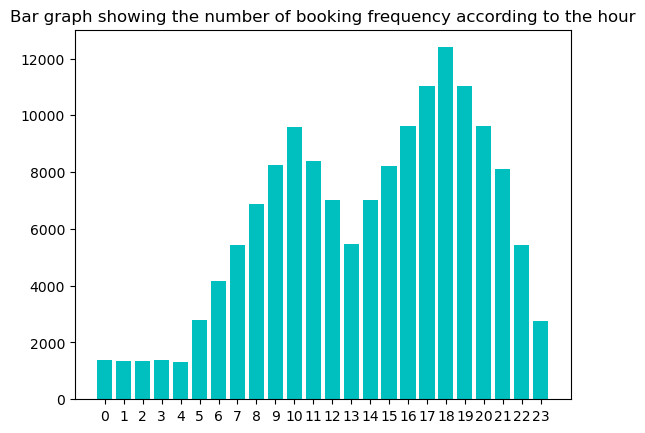

In [18]:
#Plotting a bar graph to see the relation
labels = counts.index
values = counts.values
plt.title('Bar graph showing the number of booking frequency according to the hour')
plt.bar(labels,values, color = 'c')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

- As we can see that booking is greater than normal during morning hours (8-12) and evening hours (16-20).

#### `Booking Status`

- We will now plot a pie chart to see the booking status of all the rides that we have.

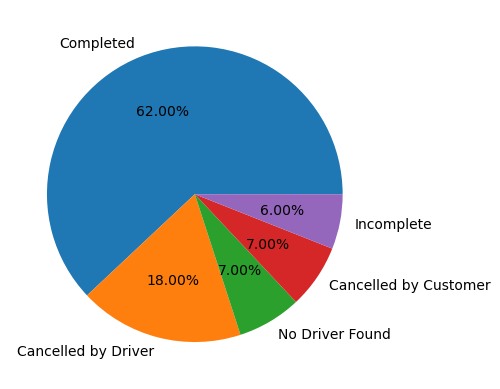

In [19]:
booking_st = df['Booking Status'].value_counts()
labels = booking_st.index
values = booking_st.values
plt.pie(values, labels = labels, autopct="%1.2f%%")
plt.show()

#### `Vehicle Type`

- Let's now see the vehicle type that were booked.

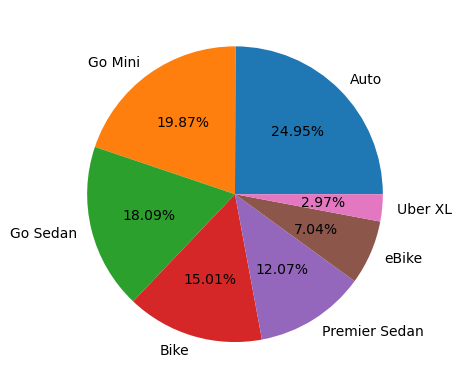

In [20]:
v_type = df['Vehicle Type'].value_counts()
labels = v_type.index
values = v_type.values
plt.pie(values, labels=labels, autopct = "%1.2f%%")
plt.show()

- Now let's see the average distance that each vehicle type travels per ride.

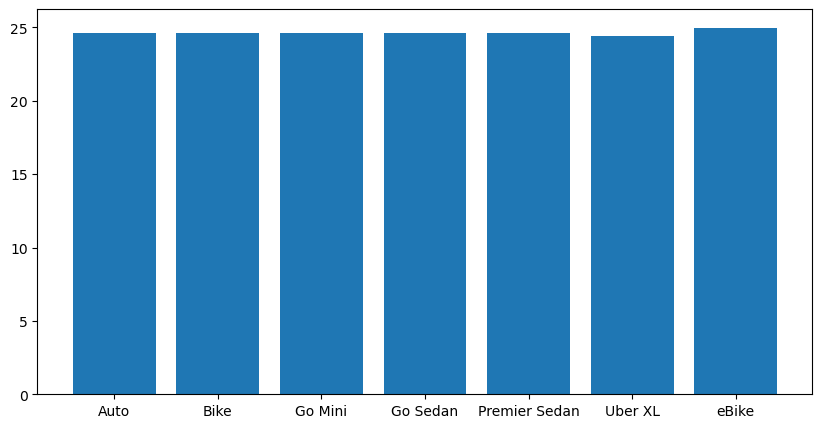

In [21]:
avg_dist = df.groupby('Vehicle Type')['Ride Distance'].mean()
values = avg_dist.values
labels = avg_dist.index
plt.figure(figsize=(10,5))
plt.bar(labels,values)
plt.show()

- As we can see that there is not much difference between the mode of transport across ride distances.
- So we should see how vehicle type differs according to the booking value.

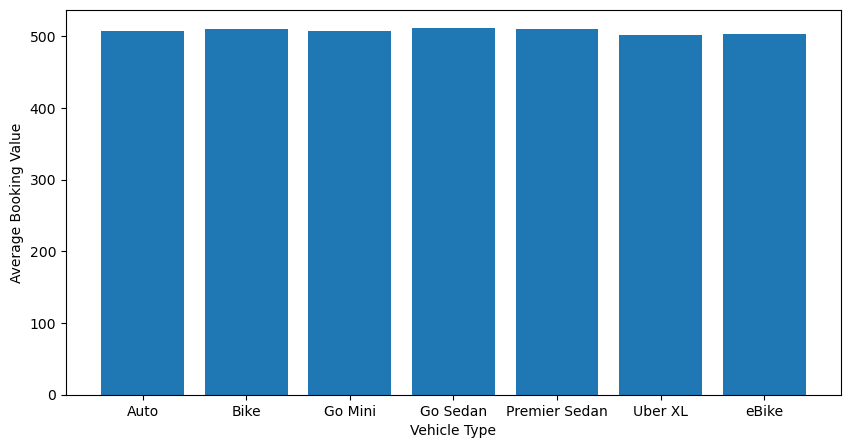

In [22]:
vehicle_by_value = df.groupby('Vehicle Type')['Booking Value'].mean()
label = vehicle_by_value.index
values = vehicle_by_value.values
plt.figure(figsize = (10,5))
plt.bar(label, values)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Booking Value')
plt.show()

- As we can see that the average booking value for all types of vehicles is almost same. Hence it tells us that people don't consider booking value to be a great metric while booking rides.

#### `Pickup and Drop Location`

- Let's see what are the most frequent pickup and drop location.

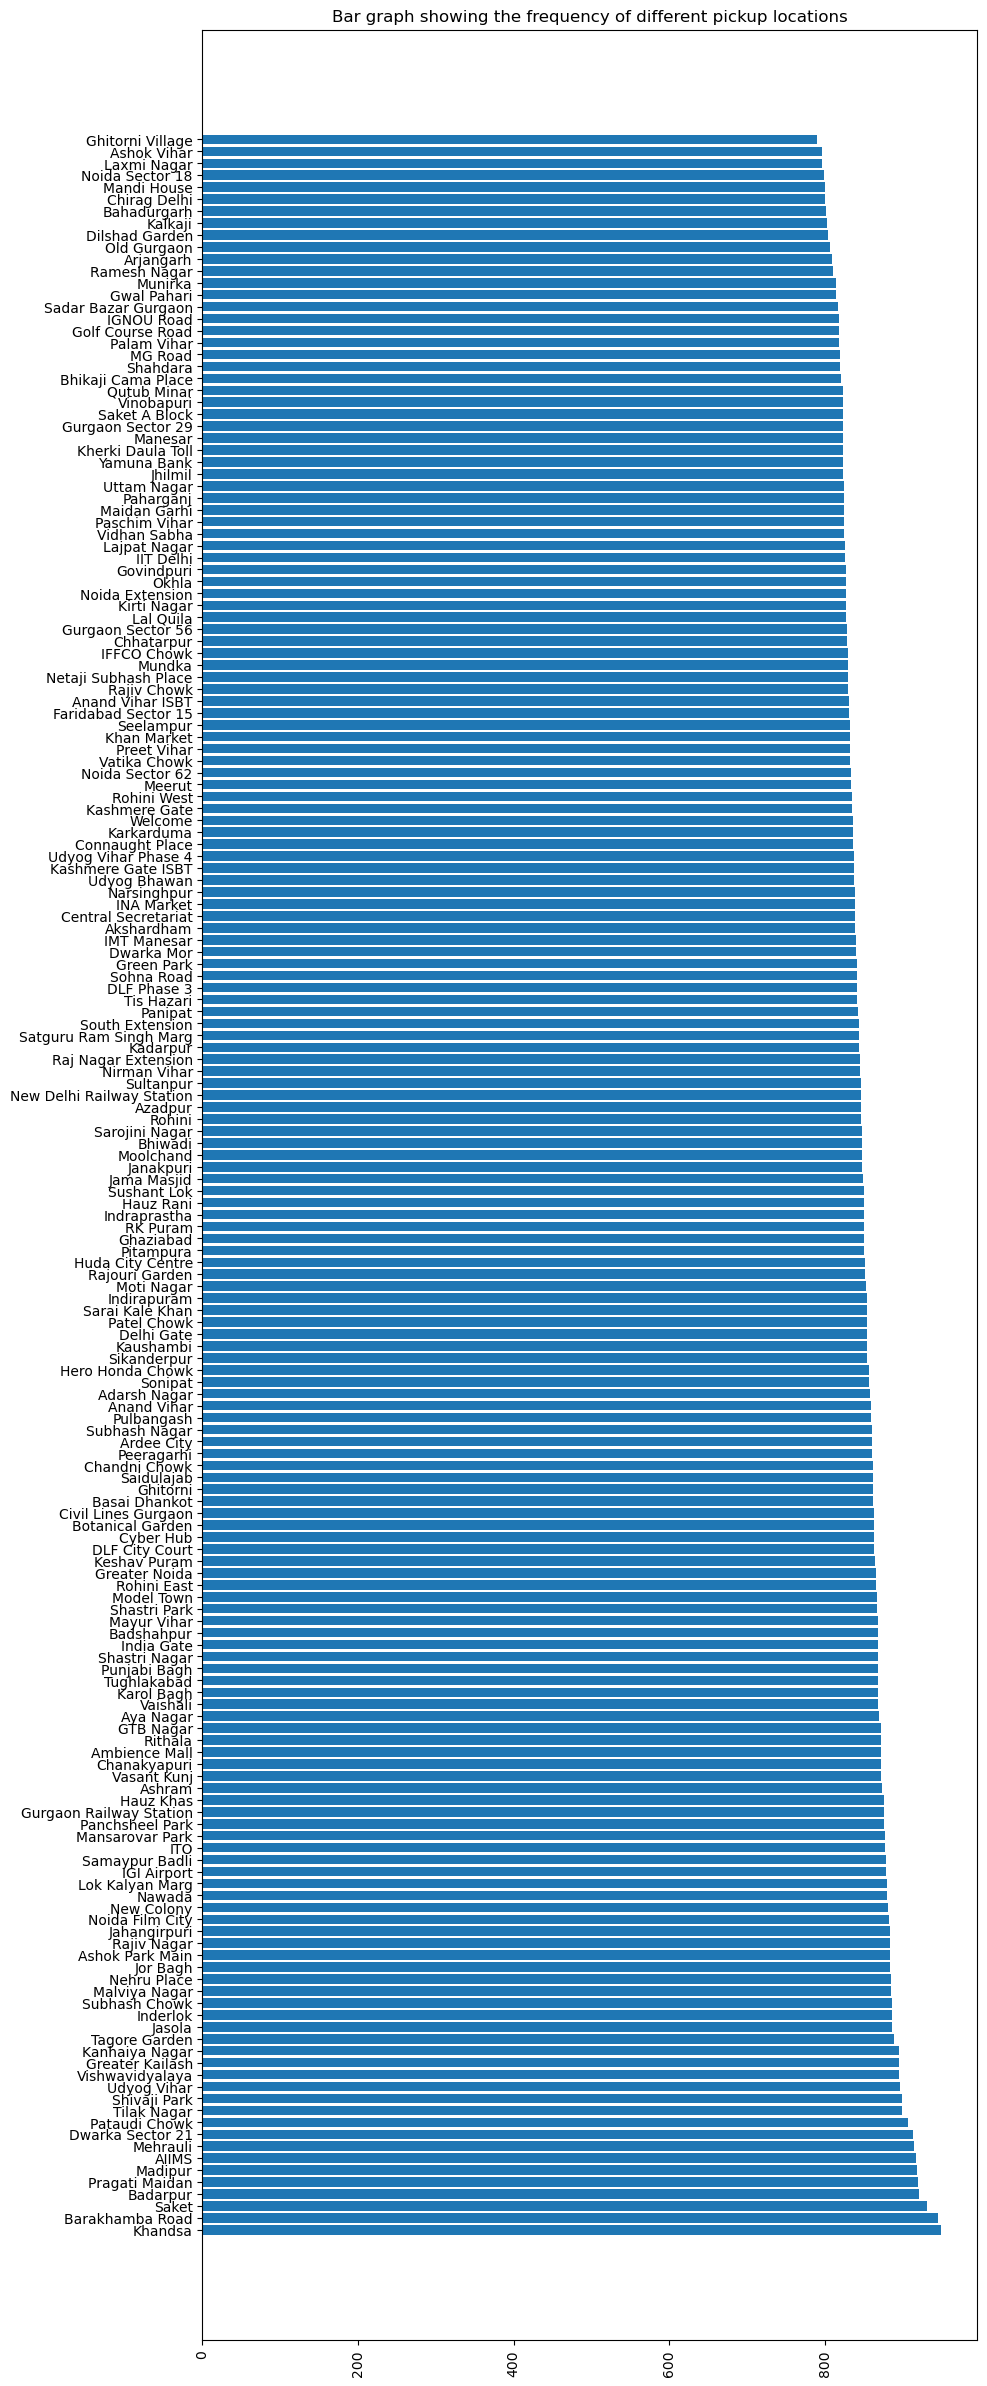

In [36]:
#Checking for Pickup Locations
pickup_count = df['Pickup Location'].value_counts()
labels = pickup_count.index
values = pickup_count.values
plt.figure(figsize=(10,30))
plt.title('Bar graph showing the frequency of different pickup locations')
plt.barh(labels,values)
plt.xticks(rotation = 90)

plt.show()

- As we can see, the top 3 pickup location are Khandsa, Barakhamba Road and Saket.
- So we should plan to have more riders in these spots to meet the demand.

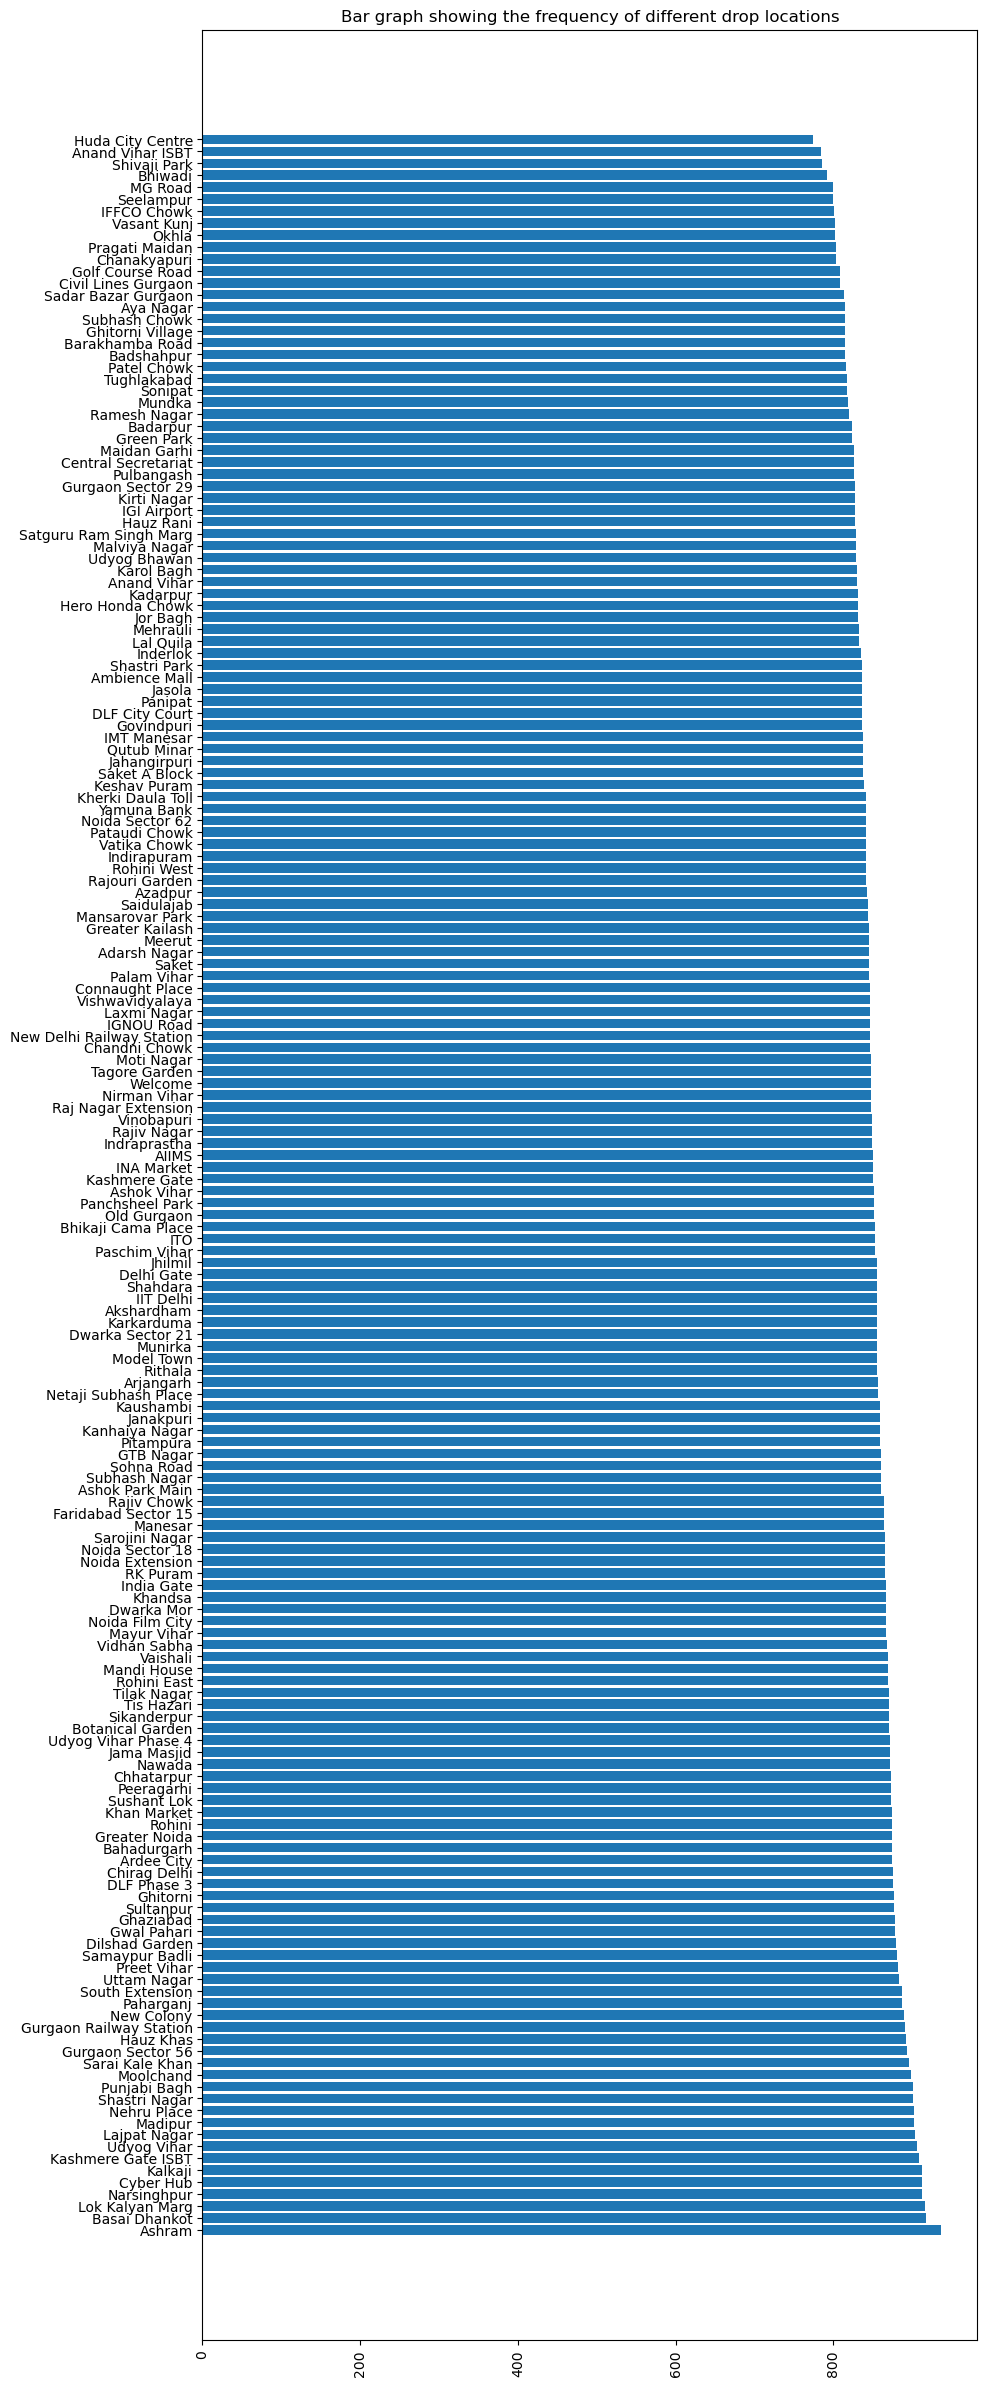

In [35]:
#Checking for Drop Location
drop_count = df['Drop Location'].value_counts()
labels = drop_count.index
values = drop_count.values
plt.figure(figsize=(10,30))
plt.title('Bar graph showing the frequency of different drop locations')
plt.barh(labels,values)
plt.xticks(rotation = 90)
plt.show()

- As we can see, the top 3 drop locations are Ashram, Basai Dhankot and Lok Kalyan Marg.

#### `Analysis of Cancelled Rides by Driver and Customer`

- First, we will filter out the rides where the driver cancelled the Ride and then we will see what was the potential reason behind it.

In [43]:
filtered_df = df[df['Cancelled Rides by Driver']==1]
filtered_df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Day,hour
12,2024-06-25,2025-09-18 22:44:15,"""CNR4386945""",Cancelled by Driver,"""CID5543520""",eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,22
17,2024-12-15,2025-09-18 15:08:25,"""CNR6739317""",Cancelled by Driver,"""CID8682675""",Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,15
19,2024-05-24,2025-09-18 19:53:57,"""CNR9465840""",Cancelled by Driver,"""CID9046501""",eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,19
26,2024-01-26,2025-09-18 09:44:00,"""CNR3614535""",Cancelled by Driver,"""CID2507102""",Auto,Cyber Hub,Saket,11.5,NaN,...,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,9
30,2024-05-18,2025-09-18 17:37:52,"""CNR2178654""",Cancelled by Driver,"""CID3631860""",Go Mini,Qutub Minar,Vishwavidyalaya,9.2,NaN,...,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149959,2024-01-24,2025-09-18 13:37:23,"""CNR4666409""",Cancelled by Driver,"""CID7135403""",Auto,Janakpuri,Preet Vihar,9.6,NaN,...,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,13
149973,2024-02-06,2025-09-18 18:03:44,"""CNR4828704""",Cancelled by Driver,"""CID3769079""",Go Sedan,Bahadurgarh,DLF City Court,6.3,NaN,...,Customer related issue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,18
149977,2024-03-02,2025-09-18 13:22:23,"""CNR9330412""",Cancelled by Driver,"""CID3815156""",Go Sedan,Pulbangash,Moolchand,7.8,NaN,...,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,13
149979,2024-10-05,2025-09-18 17:30:25,"""CNR8459494""",Cancelled by Driver,"""CID9568404""",Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,The customer was coughing/sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,17


- Now we will see the different reasons due to which the rides got cancelled most.

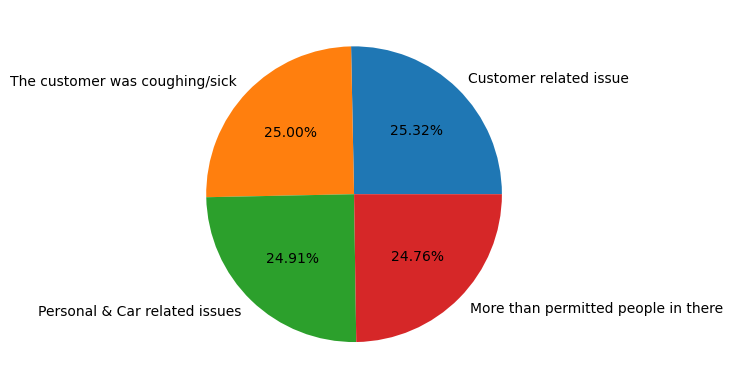

In [49]:
reason = filtered_df['Driver Cancellation Reason'].value_counts()
labels = reason.index
values = reason.values
plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.show()

- As we can see, there are 4 reasons for cancellation by driver and all of them have an almost equal weightage.
- But we observe, (The customer was sick, Customer related issue, More than permitted people in there) can all be grouped as being customer-caused issues.
- So we can see that most of the times when the driver cancelled the ride, it was because of customer-caused issues.

- Now we will see the rides where the customer cancelled the ride.

In [50]:
filtered_df = df[df['Cancelled Rides by Customer']==1]
filtered_df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Day,hour
18,2024-11-24,2025-09-18 09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,9
39,2024-09-10,2025-09-18 13:02:42,"""CNR4218487""",Cancelled by Customer,"""CID3037053""",Bike,Noida Extension,Udyog Vihar Phase 4,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,13
46,2024-08-02,2025-09-18 07:17:07,"""CNR4862806""",Cancelled by Customer,"""CID7875150""",Auto,Shastri Park,Anand Vihar ISBT,11.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,7
62,2024-02-09,2025-09-18 11:15:59,"""CNR2497989""",Cancelled by Customer,"""CID5007066""",Auto,Karkarduma,IGI Airport,16.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,11
78,2024-11-25,2025-09-18 08:29:14,"""CNR2601752""",Cancelled by Customer,"""CID9283370""",Go Sedan,Sadar Bazar Gurgaon,Indraprastha,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149943,2024-05-01,2025-09-18 16:39:56,"""CNR3486851""",Cancelled by Customer,"""CID7572575""",Bike,IGNOU Road,Kadarpur,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,16
149952,2024-04-10,2025-09-18 09:33:06,"""CNR8257559""",Cancelled by Customer,"""CID1017725""",Auto,Pitampura,IGNOU Road,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,9
149956,2024-10-10,2025-09-18 18:34:10,"""CNR6030764""",Cancelled by Customer,"""CID6873715""",Go Sedan,Hauz Rani,Dilshad Garden,13.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,18
149963,2024-02-04,2025-09-18 10:51:54,"""CNR4272547""",Cancelled by Customer,"""CID2998831""",Auto,Jahangirpuri,Lal Quila,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,10


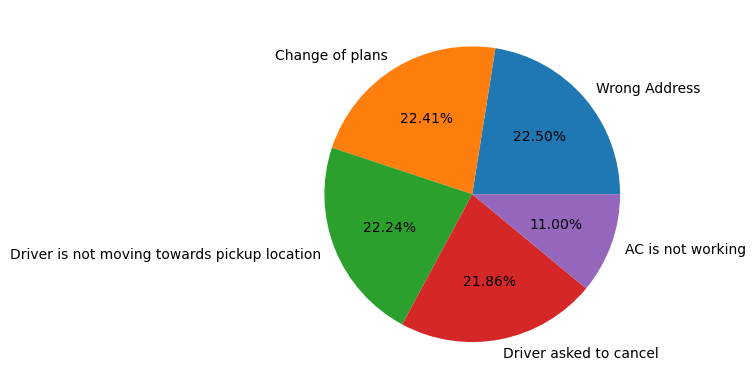

In [52]:
reason = filtered_df['Reason for cancelling by Customer'].value_counts()
labels = reason.index
values = reason.values
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.show()

#### `Driver And Customer Ratings`

In [75]:
#Dropping all the null values first
filtered_df = df.dropna(subset=['Driver Ratings','Customer Rating'])
filtered_df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Day,hour
2,2024-08-23,2025-09-18 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,Friday,8
3,2024-10-21,2025-09-18 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,Monday,17
4,2024-09-16,2025-09-18 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,Monday,22
5,2024-02-06,2025-09-18 09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI,Tuesday,9
6,2024-06-17,2025-09-18 15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI,Monday,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,2025-09-18 19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,Monday,19
149996,2024-11-24,2025-09-18 15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,Sunday,15
149997,2024-09-18,2025-09-18 10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash,Wednesday,10
149998,2024-10-05,2025-09-18 07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI,Saturday,7


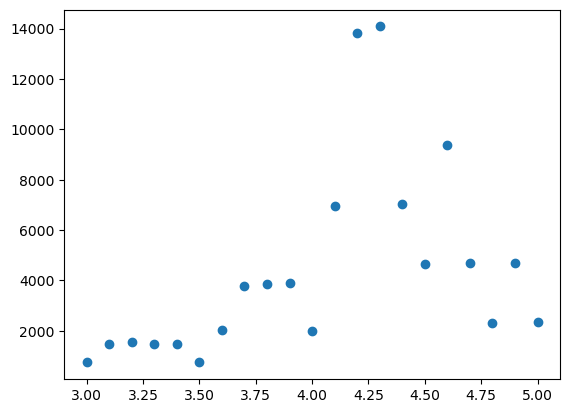

In [82]:
ratings = filtered_df['Driver Ratings'].value_counts()
labels = ratings.index
values = ratings.values
plt.scatter(labels,values)
plt.show()

- Now since we have ratings as a continous data, we should classify it into categories.

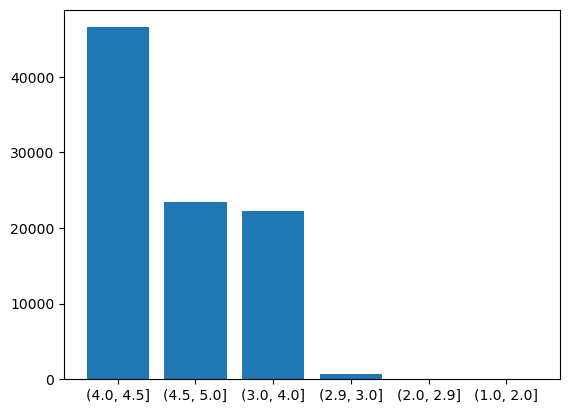

In [83]:
df['Driver_bin'] = pd.cut(filtered_df['Driver Ratings'],bins=[1,2,2.9,3,4,4.5,5])
ratings = df['Driver_bin'].value_counts()
labels = [str(interval) for interval in ratings.index]
values = ratings.values
plt.bar(labels,values)
plt.show()

- As we can see, most drivers have a rating of more than 4 and out of that, driver with ratings between 4 and 4.5 are the maximum.
- Also, no driver has a rating less than 2.9.

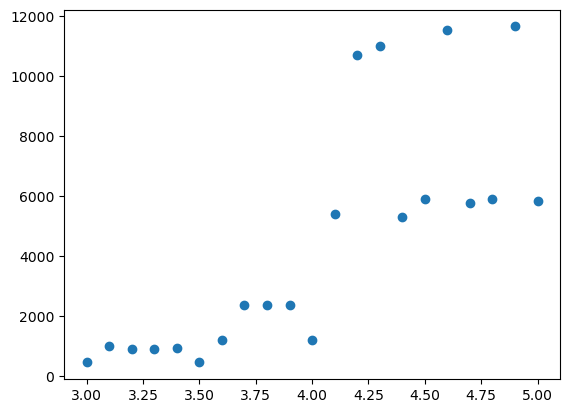

In [84]:
ratings = filtered_df['Customer Rating'].value_counts()
labels = ratings.index
values = ratings.values
plt.scatter(labels,values)
plt.show()

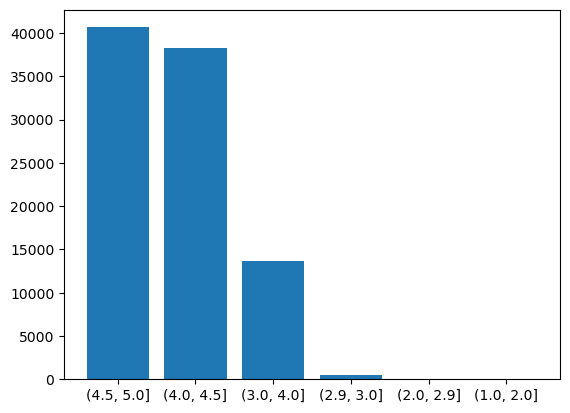

In [86]:
df['Customer_bin'] = pd.cut(filtered_df['Customer Rating'],bins=[1,2,2.9,3,4,4.5,5])
ratings = df['Customer_bin'].value_counts()
labels = [str(interval) for interval in ratings.index]
values = ratings.values
plt.bar(labels,values)
plt.show()

- As we can see, most of the customers have excellent ratings which mean that customer behaviour is not an issue for most of the rides.

#### `Payment Method`

- Now let's see the different payment methods that people use for paying the drivers.

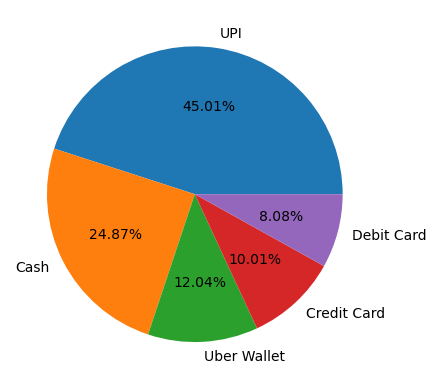

In [89]:
filtered_df = df.dropna(subset='Payment Method')
payment = filtered_df['Payment Method'].value_counts()
labels = payment.index
values = payment.values
plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.show()

In [94]:
df['price bin'] = pd.cut(filtered_df['Booking Value'],bins=[100,200,300,400,500,1000,5000])

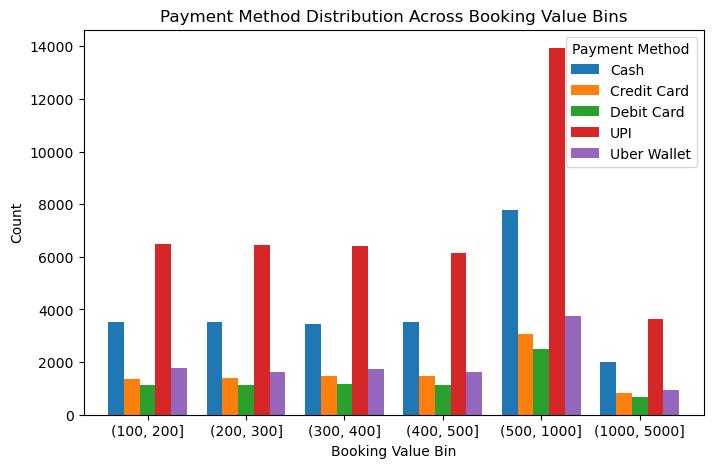

In [95]:
counts = pd.crosstab(df["price bin"], filtered_df["Payment Method"])

# Plot grouped bar chart
ax = counts.plot(kind="bar", width=0.8, figsize=(8,5))

plt.title("Payment Method Distribution Across Booking Value Bins")
plt.xlabel("Booking Value Bin")
plt.ylabel("Count")
plt.xticks(rotation=0)  # keep x labels horizontal
plt.legend(title="Payment Method")
plt.show()
